<a href="https://colab.research.google.com/github/wesleybeckner/data_science_foundations/blob/main/notebooks/labs/L4_Supervised_Learners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Foundations <br> Lab 4: Practice with Supervised Learners

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

---

<br>

In this lab we will continue to practice creation of pipelines, feature engineering, and applying learning algorithms.

Now that we have covered supervised learning methods, and we've covered Grid Search, we will use these tools to do a sophisticated, search of hyperparameter optimization.

<br>

---




In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import plotly.express as px
import random
import scipy.stats
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
import seaborn as sns; sns.set()
import graphviz 
from sklearn.metrics import accuracy_score
from ipywidgets import interact, interactive, widgets
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
wine = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
      "ds_for_engineers/main/data/wine_quality/winequalityN.csv")
# infer str cols
str_cols = list(wine.select_dtypes(include='object').columns)

#set target col
target = 'quality'

enc = OneHotEncoder()
imp = SimpleImputer()

enc.fit_transform(wine[str_cols])
X_cat = enc.transform(wine[str_cols]).toarray()
X = wine.copy()
[X.pop(i) for i in str_cols]
y = X.pop(target)
X = imp.fit_transform(X)
X = np.hstack([X_cat, X])

cols = [i.split("_")[1] for i in enc.get_feature_names_out()]
cols += list(wine.columns)
cols.remove(target)
[cols.remove(i) for i in str_cols]

scaler = StandardScaler()
X[:,2:] = scaler.fit_transform(X[:,2:])

wine = pd.DataFrame(X, columns=cols)
wine[target] = y

to compare, here is our results performing classification on this set of data with just logistic regression:

In [3]:
model = LogisticRegression(max_iter=1e4)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [4]:
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.60      0.07      0.12        46
           5       0.58      0.61      0.59       420
           6       0.52      0.68      0.59       579
           7       0.44      0.19      0.26       221
           8       0.00      0.00      0.00        32

    accuracy                           0.54      1300
   macro avg       0.36      0.26      0.26      1300
weighted avg       0.51      0.54      0.50      1300



<AxesSubplot:>

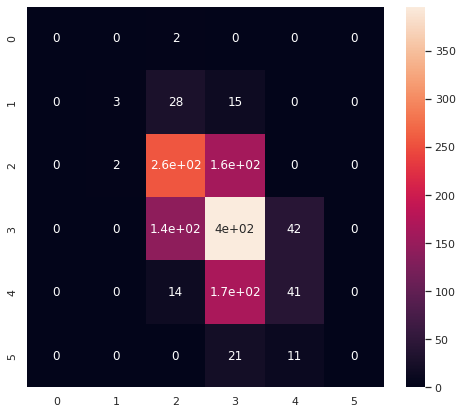

In [5]:
fig, ax = plt.subplots(1, 1, figsize = (8,7))
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, ax=ax)

## 🏎️ L4 Q1:

Evaluate the performance of a Random Forest on classifying wine quality


In [6]:
# Code Cell for L1 Q2

## 🔬 L4 Q2:

Do a grid search to optimize your Random Forest model, use whatever hyperparameters you would like



In [7]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [8]:
# Code Cell for L1 Q3

from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True, False]}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=7)